# Creating a single event-log

In [1]:
# Install requirements
#!pip install sybps
#!pip install numpy pandas pm4py
#!brew install graphviz

In [2]:
import sys
import os
import numpy as np
sys.path.append(os.path.abspath('../src'))

In [3]:
eventlog_settings = {
                    # number of traces/cases in the event-log
                    "number_of_traces":1000,

                    # level of entropy: min, medium and/or max
                    "process_entropy": "max_entropy",# "min_entropy","med_entropy","max_entropy"

                    # first or higher-order markov chain to represent the transitions "memoryless", "memory"
                    "process_type":"memory",#"memoryless",

                    # order of the HOMC - only specify this when using process with memory
                    "process_memory":2,

                    # number of activity types
                    "statespace_size":5,
                    
                    # number of transitions - only used for medium entropy (should be higher than 2 and < statespace size)
                    "med_ent_n_transitions":3,
                                    
                    # lambda parameter of inter-arrival times
                    "inter_arrival_time":1.5,
                    
                    # lambda parameter of process noise
                    "process_stability_scale":0.1,
                    
                    # probability of agent being available
                    "resource_availability_p":0.5,

                    # number of agents in the process
                    "resource_availability_n":3,

                    # waiting time in full days, when no agent is available. 0.041 is 15 minutes
                    "resource_availability_m":0.041,
                    
                    # variation between activity durations
                    "activity_duration_lambda_range":1,
                    
                    # business hours definition: when can cases be processed? ()
                    "Deterministic_offset_W":"weekdays",

                    # time-unit for a full week: days = 7, hrs = 24*7, etc.
                    "Deterministic_offset_u":7,

                    # offset for the timestamps used (years after 1970)
                    "datetime_offset":54,

                    # seed value for reproducibility:
                    "seed_value":1337
                    }

In [4]:
from SynBPS.simulation.simulate_eventlog import generate_eventlog

In [5]:
log = generate_eventlog(eventlog_settings, verbose=True)

seed: 1337
generated traces: 1000
traces: 1000
events: 5564
ids: 1000


Now we can inspect the generated event-log, which is structured as a pandas dataframe:

In [6]:
log

,caseid,activity,activity_no,y_acc_sum,z_t,n_t,q_t,h_t,b_t,s_t,v_t,u_t,starttime,endtime,arrival_datetime,start_datetime,end_datetime,start_day,start_hour
0,0,d,1,0,0.455767,0.455767,0.559653,0.082,0.021886,0.000000,0.046952,0.150838,0.559653,0.606605,2024-01-02 04:56:18,2024-01-02 07:25:54,2024-01-02 08:33:30,Tuesday,7
1,0,b,2,0,0.455767,0.606605,1.003410,0.082,0.314804,0.496590,1.294789,2.188184,1.500000,2.794789,2024-01-02 04:56:18,2024-01-03 06:00:00,2024-01-04 13:04:29,Wednesday,6
2,1,d,1,0,0.714949,0.714949,0.903284,0.123,0.065335,0.000000,0.020111,0.208446,0.903284,0.923395,2024-01-02 11:09:31,2024-01-02 15:40:43,2024-01-02 16:09:41,Tuesday,15
3,1,b,2,0,0.714949,0.923395,0.973972,0.000,0.050577,0.000000,0.602488,0.653066,0.973972,1.576461,2024-01-02 11:09:31,2024-01-02 17:22:31,2024-01-03 07:50:06,Tuesday,17
4,1,f,3,0,0.714949,1.576461,1.660348,0.082,0.001888,0.000000,1.539782,1.623669,1.660348,3.200130,2024-01-02 11:09:31,2024-01-03 09:50:54,2024-01-04 22:48:11,Wednesday,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,998,e,13,0,1497.458679,1510.113059,5.207403,0.082,0.012343,2.292597,0.402296,2.789237,1512.500000,1512.902296,2028-02-07 05:00:29,2028-02-22 06:00:00,2028-02-22 15:39:18,Tuesday,6
5560,998,e,14,0,1497.458679,1512.902296,1.133055,0.000,0.230759,0.366945,0.442444,1.040148,1513.500000,1513.942444,2028-02-07 05:00:29,2028-02-23 06:00:00,2028-02-23 16:37:07,Wednesday,6
5561,999,f,1,0,1499.887822,1499.887822,2.100591,0.041,0.171769,0.399409,0.017588,0.629766,1500.500000,1500.517588,2028-02-09 15:18:27,2028-02-10 05:59:59,2028-02-10 06:25:19,Thursday,5
5562,999,d,2,0,1499.887822,1500.517588,2.744713,0.082,0.145124,0.000000,0.261668,0.488793,1500.744713,1501.006381,2028-02-09 15:18:27,2028-02-10 11:52:23,2028-02-10 18:09:11,Thursday,11


# BPMN model
Generate a BPMN model based on the event-log using the pm4py package (requires graphviz).

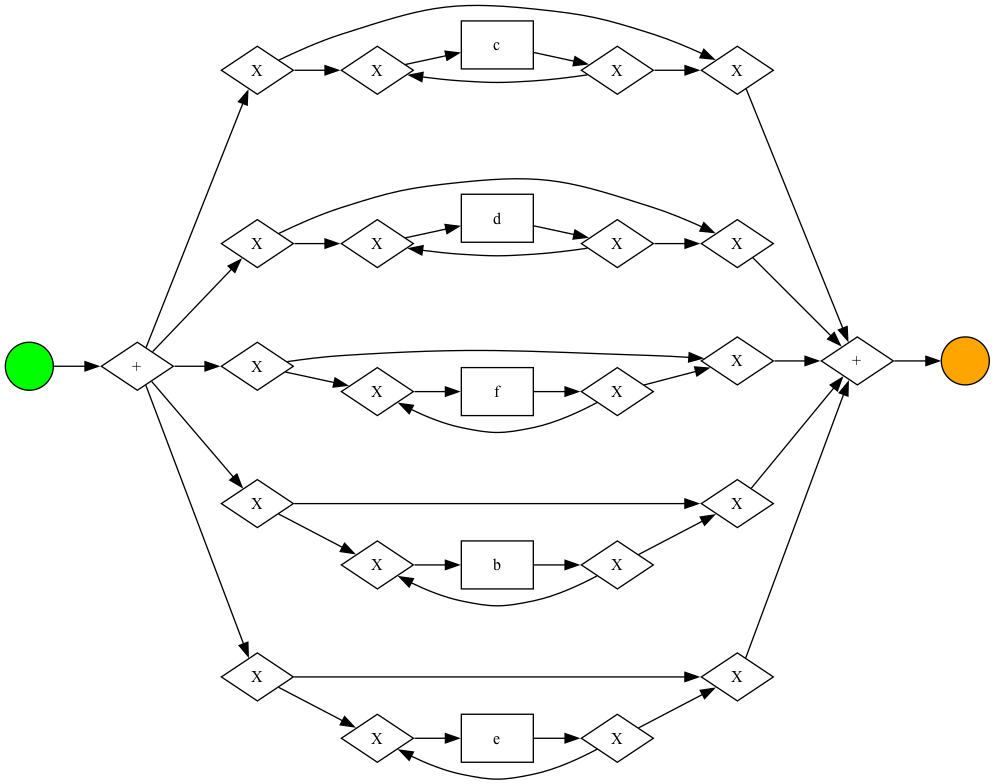

In [7]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer

# Ensure the required columns exist
required_columns = ['caseid', 'activity', 'start_datetime']
for col in required_columns:
    if col not in log.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame")

# Ensure datetime columns are in the correct format
log['start_datetime'] = pd.to_datetime(log['start_datetime'])
log['end_datetime'] = pd.to_datetime(log['end_datetime'])

# Sort the dataframe
log = log.sort_values('start_datetime')

# Convert DataFrame to event log format
dataframe = pm4py.format_dataframe(log, case_id='caseid', activity_key='activity', timestamp_key='start_datetime')
event_log = pm4py.convert_to_event_log(dataframe)

# Discover BPMN model
bpmn_model = pm4py.discover_bpmn_inductive(event_log)

# Visualize the BPMN model
bpmn_gviz = bpmn_visualizer.apply(bpmn_model)

filedest = "data/bpmn_diagram.png"

# Save the diagram as an image file (e.g., PNG)
bpmn_visualizer.save(bpmn_gviz, filedest)

# Display the image in the notebook
from IPython.display import display, Image
display(Image(filename=filedest))

# Variant analysis
Heres an example superficial analysis of the variants created in the event-log.

Number of variants: 638
Total cases: 1000
Unique variants: 638
Variant coverage (top 5): 20.70%


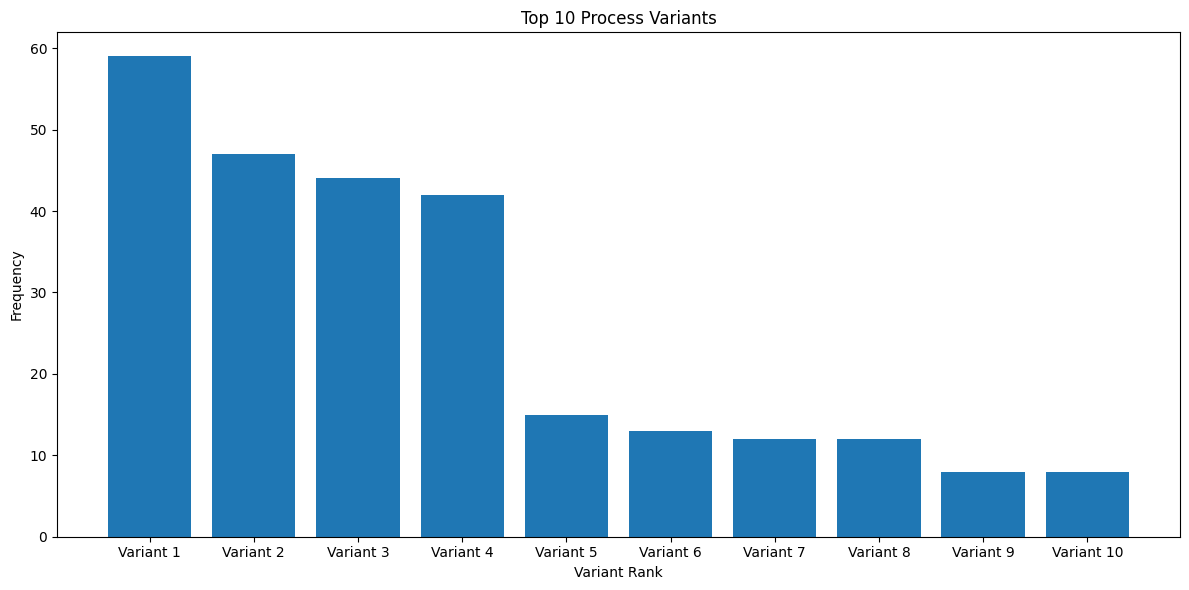


Top 5 most frequent variants:
1. Frequency: 59
   Activities: e

2. Frequency: 47
   Activities: d

3. Frequency: 44
   Activities: f

4. Frequency: 42
   Activities: b

5. Frequency: 15
   Activities: e -> f



In [8]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.filtering.log.variants import variants_filter


# Get process variants
variants = variants_filter.get_variants(event_log)

# Print the number of variants
print(f"Number of variants: {len(variants)}")


import pm4py
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Function to extract activity sequence from a variant
def get_activity_sequence(variant):
    if isinstance(variant, tuple) and len(variant) == 1:
        # Single activity variant
        return variant
    elif isinstance(variant, tuple) and all(isinstance(item, tuple) for item in variant):
        # Multi-activity variant
        return tuple(activity for activity, _ in variant)
    else:
        # Unexpected format, return as is
        return variant

# Extract and count variants
variant_counts = Counter()
for variant, traces in variants.items():
    activity_sequence = get_activity_sequence(variant)
    variant_counts[activity_sequence] = len(traces)

# Convert to DataFrame for easier analysis
df_variants = pd.DataFrame(list(variant_counts.items()), columns=['Variant', 'Frequency'])
df_variants = df_variants.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Calculate some statistics
total_cases = sum(df_variants['Frequency'])
unique_variants = len(df_variants)
top_5_coverage = df_variants['Frequency'].head(5).sum() / total_cases

# Print statistics
print(f"Total cases: {total_cases}")
print(f"Unique variants: {unique_variants}")
print(f"Variant coverage (top 5): {top_5_coverage:.2%}")

# Visualize top 10 variants
plt.figure(figsize=(12, 6))
plt.bar(range(10), df_variants['Frequency'].head(10))
plt.title('Top 10 Process Variants')
plt.xlabel('Variant Rank')
plt.ylabel('Frequency')
plt.xticks(range(10), [f"Variant {i+1}" for i in range(10)])
plt.tight_layout()
plt.show()

# Print details of top 5 variants
print("\nTop 5 most frequent variants:")
for i, (variant, freq) in enumerate(df_variants.head(5).itertuples(index=False), 1):
    print(f"{i}. Frequency: {freq}")
    print(f"   Activities: {' -> '.join(str(v) for v in variant)}")
    print()